# NYC Real Estate Sales Records and MACHINE LEARNING PROJECT.

# 1)PIPELINE:   Sourcing and loading

In [1]:
import pandas as pd
import numpy as np
NYC_df = pd.read_csv('nyc-rolling-sales-1.csv')
print(NYC_df.isnull().sum())
print("total number of Rows and Columns in the dataframe: " , NYC_df.shape)
NYC_df

Unnamed: 0                        0
BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
EASE-MENT                         0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64
total number of Rows and Columns in the dataframe:  (84548, 22)


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00


# 2) PIPELINE:   Cleaning, transforming, and visualizing

# PLEASE NOTE: THERE ARE NULL VALUES EVEN THOUGH THE ABOVE CODE OUTPUT SHOWS THERE ARE NO NULL VALUES. IT IS BECAUSE THE DATA TYPES OF SOME OF THE COLUMNS ARE OBJECT, RATHER THAN NUMERIC. 

In [2]:
NYC_df['SALE PRICE'] = pd.to_numeric(NYC_df['SALE PRICE'], errors='coerce').fillna(0).astype(int)
NYC_df['GROSS SQUARE FEET'] = pd.to_numeric(NYC_df['GROSS SQUARE FEET'], errors='coerce').fillna(0).astype(int)
NYC_df['LAND SQUARE FEET'] = pd.to_numeric(NYC_df['LAND SQUARE FEET'], errors='coerce').fillna(0).astype(int)
print(NYC_df.dtypes)
# NYC_df[['SALE PRICE','GROSS SQUARE FEET','LAND SQUARE FEET']] = NYC_df[['SALE PRICE','GROSS SQUARE FEET','LAND SQUARE FEET']].astype(int)

Unnamed: 0                         int64
BOROUGH                            int64
NEIGHBORHOOD                      object
BUILDING CLASS CATEGORY           object
TAX CLASS AT PRESENT              object
BLOCK                              int64
LOT                                int64
EASE-MENT                         object
BUILDING CLASS AT PRESENT         object
ADDRESS                           object
APARTMENT NUMBER                  object
ZIP CODE                           int64
RESIDENTIAL UNITS                  int64
COMMERCIAL UNITS                   int64
TOTAL UNITS                        int64
LAND SQUARE FEET                   int32
GROSS SQUARE FEET                  int32
YEAR BUILT                         int64
TAX CLASS AT TIME OF SALE          int64
BUILDING CLASS AT TIME OF SALE    object
SALE PRICE                         int32
SALE DATE                         object
dtype: object


In [3]:
# The value '- ' from the columns should be change into np.nan for interpolation, except the column 'SALES PRICE' as 
# the website says that the value, 0@, signifies the transfer of money 
NYC_df[['GROSS SQUARE FEET','LAND SQUARE FEET']] = NYC_df[['GROSS SQUARE FEET','LAND SQUARE FEET']].replace(0, np.nan)
NYC_df.isnull().sum()
# Changed the -ve value in the column, SALES PRICE, as there is no negative value for that
NYC_df['SALE PRICE'] = NYC_df['SALE PRICE'].apply(lambda x: x*-1 if x <0 else x)
NYC_df=NYC_df.interpolate(columns=['GROSS SQUARE FEET','LAND SQUARE FEET'])
NYC_df.isnull().sum()
# USELESS COLUMNS DROPPING 
COLumns_NaN= NYC_df[["Unnamed: 0", "EASE-MENT","APARTMENT NUMBER"]]

dropped_columns = ["Unnamed: 0", "EASE-MENT","APARTMENT NUMBER"]

# Drop the specified columns
NYC_df = NYC_df.drop(dropped_columns, axis=1, inplace=False)

NYC_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009,28,3,31,4616.0,18690.0,1900,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009,16,1,17,2212.0,7803.0,1900,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309,2,0,2,2400.0,2575.0,1998,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309,2,0,2,2498.0,2377.0,1998,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309,2,0,2,4000.0,1496.0,1925,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309,0,7,7,208033.0,64117.0,2001,4,K6,11693337,2016-12-21 00:00:00


In [4]:
unique_values = pd.Series({col: NYC_df[col].unique() for col in NYC_df})
unique_values

BOROUGH                                                             [1, 2, 3, 4, 5]
NEIGHBORHOOD                      [ALPHABET CITY, CHELSEA, CHINATOWN, CIVIC CENT...
BUILDING CLASS CATEGORY           [07 RENTALS - WALKUP APARTMENTS             , ...
TAX CLASS AT PRESENT                        [2A, 2, 2B, 2C,  , 4, 1, 1C, 3, 1A, 1B]
BLOCK                             [392, 399, 402, 404, 405, 406, 407, 379, 387, ...
LOT                               [6, 26, 39, 21, 55, 16, 32, 18, 34, 153, 44, 4...
BUILDING CLASS AT PRESENT         [C2, C7, C4, D5, D9, D7, D1, C6, D0, D4, RR,  ...
ADDRESS                           [153 AVENUE B, 234 EAST 4TH   STREET, 197 EAST...
ZIP CODE                          [10009, 0, 10002, 10011, 10001, 10014, 10010, ...
RESIDENTIAL UNITS                 [5, 28, 16, 10, 6, 20, 8, 44, 15, 24, 30, 0, 4...
COMMERCIAL UNITS                  [0, 3, 1, 2, 4, 13, 5, 24, 6, 19, 10, 15, 14, ...
TOTAL UNITS                       [5, 31, 17, 10, 6, 20, 8, 46, 15, 24, 34, 

In [5]:
for col in NYC_df.columns:
    if col in ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'ZIP CODE', 'TAX CLASS AT PRESENT','YEAR BUILT', 'BUILDING CLASS AT PRESENT']:
        NYC_df[col] = NYC_df[col].replace(0, np.nan)
        NYC_df[col] = NYC_df[col].replace(' ', np.nan)
    NYC_df[col] = NYC_df[col].fillna(method='bfill')
    NYC_df[col] = NYC_df[col].fillna(method='ffill')
NYC_df['COMMERCIAL UNITS'] = NYC_df['COMMERCIAL UNITS'].interpolate()
NYC_df['TAX CLASS AT PRESENT'] = NYC_df['TAX CLASS AT PRESENT'].interpolate() 
NYC_df['BUILDING CLASS AT PRESENT'] = NYC_df['BUILDING CLASS AT PRESENT'].interpolate()
NYC_df['YEAR BUILT'] = NYC_df['YEAR BUILT'].interpolate()
NYC_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009.0,5.0,3.0,5.0,1633.0,6440.0,1900.0,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900.0,2,C7,0,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900.0,2,C7,0,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009.0,10.0,2.0,10.0,2272.0,6794.0,1913.0,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009.0,6.0,2.0,6.0,2369.0,4615.0,1900.0,2,C2,8000000,2016-11-17 00:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309.0,2.0,7.0,2.0,2400.0,2575.0,1998.0,1,B9,450000,2016-11-28 00:00:00
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309.0,2.0,7.0,2.0,2498.0,2377.0,1998.0,1,B9,550000,2017-04-21 00:00:00
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309.0,2.0,7.0,2.0,4000.0,1496.0,1925.0,1,B2,460000,2017-07-05 00:00:00
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309.0,2.0,7.0,7.0,208033.0,64117.0,2001.0,4,K6,11693337,2016-12-21 00:00:00


In [6]:
# changing the column 'SALE DATE' datetime format into only date. 
NYC_df['SALE DATE'] = pd.to_datetime(NYC_df['SALE DATE']).dt.date
NYC_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009.0,5.0,3.0,5.0,1633.0,6440.0,1900.0,2,C2,6625000,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900.0,2,C7,0,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900.0,2,C7,0,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009.0,10.0,2.0,10.0,2272.0,6794.0,1913.0,2,C4,3936272,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009.0,6.0,2.0,6.0,2369.0,4615.0,1900.0,2,C2,8000000,2016-11-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309.0,2.0,7.0,2.0,2400.0,2575.0,1998.0,1,B9,450000,2016-11-28
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309.0,2.0,7.0,2.0,2498.0,2377.0,1998.0,1,B9,550000,2017-04-21
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309.0,2.0,7.0,2.0,4000.0,1496.0,1925.0,1,B2,460000,2017-07-05
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309.0,2.0,7.0,7.0,208033.0,64117.0,2001.0,4,K6,11693337,2016-12-21


In [7]:
duplicate_rows = NYC_df[NYC_df.duplicated()]
duplicate_rows

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
208,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011.0,1.0,1.0,1.0,1588.0,5653.0,1900.0,1,A4,10,2017-01-30
209,1,CHELSEA,01 ONE FAMILY DWELLINGS,1,772,29,A4,231 WEST 22ND STREET,10011.0,1.0,1.0,1.0,1588.0,5653.0,1900.0,1,A4,10,2017-01-30
1798,1,EAST VILLAGE,07 RENTALS - WALKUP APARTMENTS,2,436,48,C7,103 ST MARKS PLACE,10009.0,21.0,2.0,23.0,3522.0,13405.0,1920.0,2,C7,0,2017-06-07
2054,1,FASHION,22 STORE BUILDINGS,4,789,43,K2,558 7TH AVENUE,10018.0,529.0,7.0,7.0,2469.0,7259.0,1925.0,4,K2,0,2017-01-05
3509,1,GRAMERCY,34 THEATRES,4,872,78,J5,44 UNION SQUARE,10003.0,1.0,6.0,6.0,11975.0,48000.0,1929.0,4,J5,0,2016-12-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84209,5,WILLOWBROOK,01 ONE FAMILY DWELLINGS,1,748,18,A2,586 WOOLLEY AVENUE,10314.0,1.0,1.0,1.0,5000.0,1080.0,1955.0,1,A2,0,2017-02-07
84292,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,735,24,B9,492 INGRAM AVENUE,10314.0,2.0,1.0,2.0,2200.0,1440.0,1970.0,1,B9,0,2016-09-08
84319,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,790,80,B2,267 CRAFTON AVENUE,10314.0,2.0,1.0,2.0,4320.0,2288.0,1970.0,1,B2,0,2017-01-10
84346,5,WILLOWBROOK,02 TWO FAMILY DWELLINGS,1,1975,513,B2,180 WALCOTT AVENUE,10314.0,2.0,1.0,2.0,4100.0,2010.0,1975.0,1,B2,0,2017-07-03


PLEASE NOTE: It is decided that the only duplicates rows be deleted that has all the columns with the same row values that are shown in the above cell.

In [8]:
# delete duplicates that have all same values in a row in place
NYC_df = NYC_df.drop_duplicates(keep=False)
NYC_df.describe(include='all')

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
count,83664.000000,83664,83664,83664,83664.000000,83664.000000,83664,83664,83664.000000,83664.000000,83664.000000,83664.000000,8.366400e+04,8.366400e+04,83664.000000,83664.000000,83664,8.366400e+04,83664
unique,NaN,254,47,10,NaN,NaN,165,67215,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,165,NaN,364
top,NaN,FLUSHING-NORTH,01 ONE FAMILY DWELLINGS,1,NaN,NaN,R4,131-05 40TH ROAD,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R4,NaN,2017-06-29
freq,NaN,3053,17986,38058,NaN,NaN,12979,210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12989,NaN,540
mean,2.996486,NaN,NaN,NaN,4234.304289,379.656758,NaN,NaN,10855.594581,16.515957,2.079066,16.494299,1.835039e+04,3.783558e+04,1951.427388,1.657559,NaN,1.063340e+06,NaN
std,1.291099,NaN,NaN,NaN,3564.728102,660.710081,NaN,NaN,563.093723,94.579820,10.269963,95.300114,1.549471e+05,1.586465e+05,35.025329,0.816334,NaN,1.027471e+07,NaN
min,1.000000,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,10001.000000,1.000000,1.000000,1.000000,2.000000e+00,8.000000e+01,1111.000000,1.000000,NaN,0.000000e+00,NaN
25%,2.000000,NaN,NaN,NaN,1323.000000,22.000000,NaN,NaN,10306.000000,1.000000,1.000000,1.000000,2.185000e+03,1.832000e+03,1925.000000,1.000000,NaN,0.000000e+00,NaN
50%,3.000000,NaN,NaN,NaN,3309.000000,50.000000,NaN,NaN,11209.000000,1.000000,1.000000,1.000000,3.194000e+03,3.369091e+03,1948.000000,2.000000,NaN,4.200000e+05,NaN
75%,4.000000,NaN,NaN,NaN,6272.250000,1001.000000,NaN,NaN,11357.000000,2.000000,2.000000,2.000000,6.281514e+03,1.824289e+04,1975.000000,2.000000,NaN,8.380000e+05,NaN


In [9]:
# checking for logically redundant features
NYC_df.corr()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,SALE PRICE
BOROUGH,1.000000,0.417986,-0.278572,0.613178,-0.052836,-0.030596,-0.049541,0.044624,-0.117214,0.056491,-0.313827,-0.071809
BLOCK,0.417986,1.000000,-0.230569,0.552656,-0.009691,0.000188,-0.006956,0.060696,-0.053052,-0.050331,-0.285796,-0.055430
LOT,-0.278572,-0.230569,1.000000,-0.223683,-0.067895,0.009942,-0.069158,-0.029074,0.004293,0.391824,0.299898,0.010671
ZIP CODE,0.613178,0.552656,-0.223683,1.000000,-0.044904,-0.034892,-0.041958,0.017205,-0.109947,-0.101294,-0.180783,-0.060179
RESIDENTIAL UNITS,-0.052836,-0.009691,-0.067895,-0.044904,1.000000,0.125857,0.988816,0.507643,0.543511,-0.019460,0.075911,0.021339
COMMERCIAL UNITS,-0.030596,0.000188,0.009942,-0.034892,0.125857,1.000000,0.198519,0.074353,0.075923,0.016803,0.041262,0.029006
TOTAL UNITS,-0.049541,-0.006956,-0.069158,-0.041958,0.988816,0.198519,1.000000,0.510614,0.541728,-0.019186,0.066278,0.015027
LAND SQUARE FEET,0.044624,0.060696,-0.029074,0.017205,0.507643,0.074353,0.510614,1.000000,0.856202,0.025474,0.053014,0.005821
GROSS SQUARE FEET,-0.117214,-0.053052,0.004293,-0.109947,0.543511,0.075923,0.541728,0.856202,1.000000,0.036979,0.113520,0.062104
YEAR BUILT,0.056491,-0.050331,0.391824,-0.101294,-0.019460,0.016803,-0.019186,0.025474,0.036979,1.000000,0.209857,0.002912


# Visualizing the data

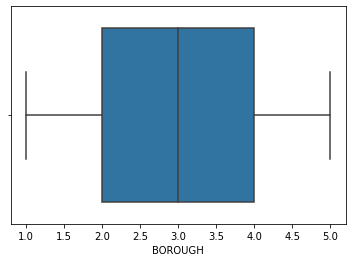

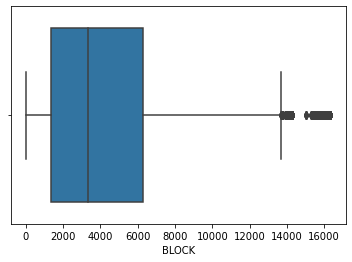

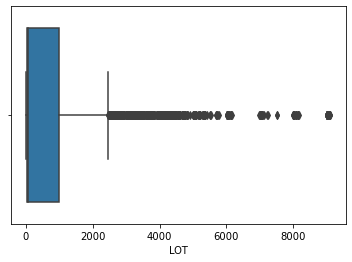

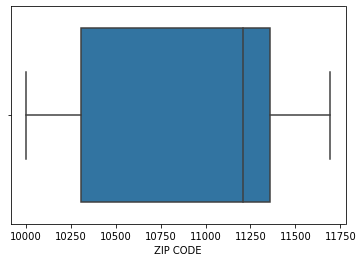

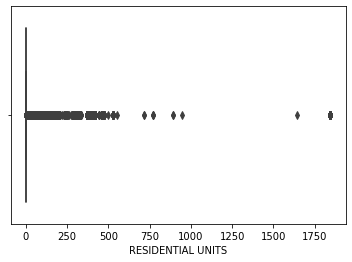

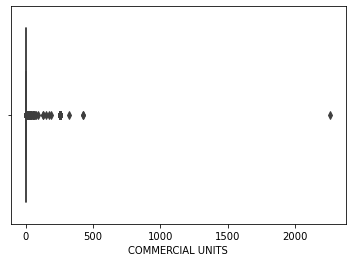

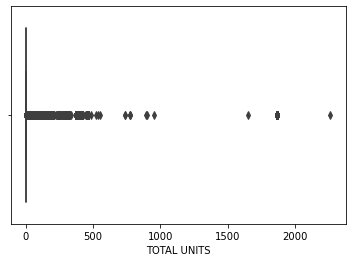

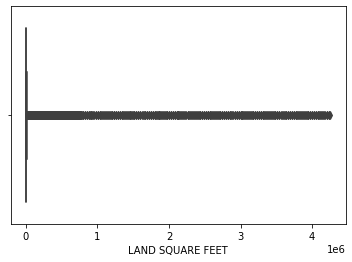

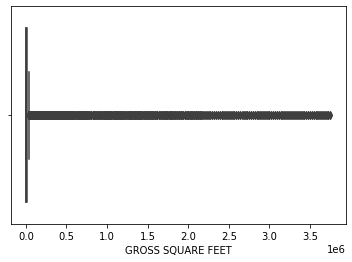

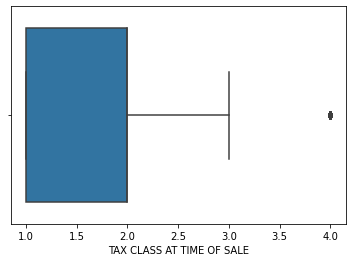

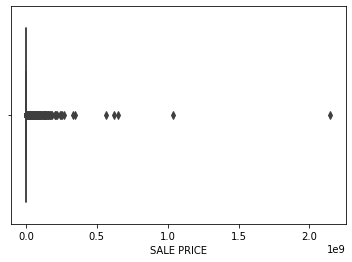

In [10]:
# to find the outliers
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

for col in NYC_df.columns:
    if col in ['BOROUGH', 'BLOCK', 'LOT','ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'TAX CLASS AT TIME OF SALE',
       'SALE PRICE']:
        # calculate the z-scores of the 'bmi' column
        z_scores = stats.zscore(NYC_df[col])
        # filter out the outliers

        
for col in NYC_df.columns:
    if col in ['BOROUGH', 'BLOCK', 'LOT','ZIP CODE', 'RESIDENTIAL UNITS', 'COMMERCIAL UNITS',
       'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET',
       'TAX CLASS AT TIME OF SALE',
       'SALE PRICE']:
    # create a boxplot for each column
        sns.boxplot(x=col, data=NYC_df)
    # show the plot
    plt.show()


In [11]:
NYC_df.dtypes

BOROUGH                             int64
NEIGHBORHOOD                       object
BUILDING CLASS CATEGORY            object
TAX CLASS AT PRESENT               object
BLOCK                               int64
LOT                                 int64
BUILDING CLASS AT PRESENT          object
ADDRESS                            object
ZIP CODE                          float64
RESIDENTIAL UNITS                 float64
COMMERCIAL UNITS                  float64
TOTAL UNITS                       float64
LAND SQUARE FEET                  float64
GROSS SQUARE FEET                 float64
YEAR BUILT                        float64
TAX CLASS AT TIME OF SALE           int64
BUILDING CLASS AT TIME OF SALE     object
SALE PRICE                          int64
SALE DATE                          object
dtype: object

# ---CONVERSION OF CATEGORICAL COLUMNS INTO Binning And then to NUMERIC ---

In [12]:
# to consize and categorise the column by looking up the first letter in the column and giving respective names 
first_letter = NYC_df['BUILDING CLASS AT TIME OF SALE'].str[0] # or df["Name"].str.extract("^(\w)")
first_letter.unique()

# using a custom function
def checking_building_class(first_letter):
    if first_letter == 'C':
        return "WALK UP APARTMENTS"
    elif first_letter =='D':
        return "ELEVATOR APARTMENTS"
    elif first_letter =='R':
        return "CONDOMINIUMS"
    elif first_letter =='S':
        return "PRIMARILY RES. - MIXED USE"
    elif first_letter =='K':
        return "STORE BUILDINGS"
    elif first_letter =='M':
        return "RELIGIOUS FACILITIES"
    elif first_letter =='A':
        return "ONE FAMILY DWELLINGS"
    elif first_letter =='B':
        return "TWO FAMILY DWELLINGS"
    elif first_letter =='O':
        return "OFFICE BUILDINGS"
    elif first_letter =='L':
        return "LOFTS"
    elif first_letter =='H':
        return "HOTELS"
    elif first_letter =='G':
        return "GARAGES"
    elif first_letter =='P':
        return "INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES"
    elif first_letter =='N':
        return "ASYLUMS AND HOMES"
    elif first_letter =='V':
        return "VACANT LAND"
    elif first_letter =='I':
        return "HOSPITALS AND HEALTH FACILITIES"
    elif first_letter =='Z':
        return "MISC. BUILDING CLASSIFICATIONS"
    elif first_letter =='U':
        return "UTILITY BUREAU PROPERTIES"
    elif first_letter =='E':
        return "WAREHOUSES"
    elif first_letter =='Q':
        return "OUTDOOR RECREATIONAL FACILITIES"
    elif first_letter =='J':
        return "THEATRES"
    elif first_letter =='F':
        return "FACTORIES AND INDUSTRIAL BUILDINGS"
    elif first_letter =='Y':
        return "GOVERNMENT/CITY DEPARTMENTS"
    elif first_letter =='W':
        return "EDUCATIONAL FACILITIES"
    elif first_letter =='T':
        return "TRANSPORTATION FACILITIES"
    else:
        return "X"

NYC_df["Building_class"] = first_letter.apply(checking_building_class)
NYC_df

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,Building_class
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,10009.0,5.0,3.0,5.0,1633.0,6440.0,1900.0,2,C2,6625000,2017-07-19,WALK UP APARTMENTS
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900.0,2,C7,0,2016-12-14,WALK UP APARTMENTS
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900.0,2,C7,0,2016-12-09,WALK UP APARTMENTS
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,10009.0,10.0,2.0,10.0,2272.0,6794.0,1913.0,2,C4,3936272,2016-09-23,WALK UP APARTMENTS
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,10009.0,6.0,2.0,6.0,2369.0,4615.0,1900.0,2,C2,8000000,2016-11-17,WALK UP APARTMENTS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,B9,37 QUAIL LANE,10309.0,2.0,7.0,2.0,2400.0,2575.0,1998.0,1,B9,450000,2016-11-28,TWO FAMILY DWELLINGS
84544,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,B9,32 PHEASANT LANE,10309.0,2.0,7.0,2.0,2498.0,2377.0,1998.0,1,B9,550000,2017-04-21,TWO FAMILY DWELLINGS
84545,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,B2,49 PITNEY AVENUE,10309.0,2.0,7.0,2.0,4000.0,1496.0,1925.0,1,B2,460000,2017-07-05,TWO FAMILY DWELLINGS
84546,5,WOODROW,22 STORE BUILDINGS,4,7100,28,K6,2730 ARTHUR KILL ROAD,10309.0,2.0,7.0,7.0,208033.0,64117.0,2001.0,4,K6,11693337,2016-12-21,STORE BUILDINGS


In [13]:
# Conversion of BINNED CATEGORICAL COLUMNS into NUMERIC 
dummy_BuiltaxNeigSALE = pd.get_dummies(NYC_df, columns=['Building_class', 'TAX CLASS AT TIME OF SALE', 'NEIGHBORHOOD', 'SALE DATE'])
      
# Removal of the categorical columns from the dummy dataframes since they are not going to be used in the ML algorithm.
# 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT',
# 'ADDRESS','BUILDING CLASS AT TIME OF SALE','zipcode', 'block', 'lot'

dummy_BuiltaxNeigSALE.drop(columns=['BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ADDRESS','BUILDING CLASS AT TIME OF SALE'], inplace=True)


dummy_BuiltaxNeigSALE

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,...,SALE DATE_2017-08-22,SALE DATE_2017-08-23,SALE DATE_2017-08-24,SALE DATE_2017-08-25,SALE DATE_2017-08-26,SALE DATE_2017-08-27,SALE DATE_2017-08-28,SALE DATE_2017-08-29,SALE DATE_2017-08-30,SALE DATE_2017-08-31
0,1,392,6,10009.0,5.0,3.0,5.0,1633.0,6440.0,1900.0,...,0,0,0,0,0,0,0,0,0,0
1,1,399,26,10009.0,28.0,3.0,31.0,4616.0,18690.0,1900.0,...,0,0,0,0,0,0,0,0,0,0
2,1,399,39,10009.0,16.0,1.0,17.0,2212.0,7803.0,1900.0,...,0,0,0,0,0,0,0,0,0,0
3,1,402,21,10009.0,10.0,2.0,10.0,2272.0,6794.0,1913.0,...,0,0,0,0,0,0,0,0,0,0
4,1,404,55,10009.0,6.0,2.0,6.0,2369.0,4615.0,1900.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84543,5,7349,34,10309.0,2.0,7.0,2.0,2400.0,2575.0,1998.0,...,0,0,0,0,0,0,0,0,0,0
84544,5,7349,78,10309.0,2.0,7.0,2.0,2498.0,2377.0,1998.0,...,0,0,0,0,0,0,0,0,0,0
84545,5,7351,60,10309.0,2.0,7.0,2.0,4000.0,1496.0,1925.0,...,0,0,0,0,0,0,0,0,0,0
84546,5,7100,28,10309.0,2.0,7.0,7.0,208033.0,64117.0,2001.0,...,0,0,0,0,0,0,0,0,0,0


In [14]:
dummy_BuiltaxNeigSALE.columns.tolist()

['BOROUGH',
 'BLOCK',
 'LOT',
 'ZIP CODE',
 'RESIDENTIAL UNITS',
 'COMMERCIAL UNITS',
 'TOTAL UNITS',
 'LAND SQUARE FEET',
 'GROSS SQUARE FEET',
 'YEAR BUILT',
 'SALE PRICE',
 'Building_class_ASYLUMS AND HOMES',
 'Building_class_CONDOMINIUMS',
 'Building_class_EDUCATIONAL FACILITIES',
 'Building_class_ELEVATOR APARTMENTS',
 'Building_class_FACTORIES AND INDUSTRIAL BUILDINGS',
 'Building_class_GARAGES',
 'Building_class_GOVERNMENT/CITY DEPARTMENTS',
 'Building_class_HOSPITALS AND HEALTH FACILITIES',
 'Building_class_HOTELS',
 'Building_class_INDOOR PUBLIC ASSEMBLY & CULT. FACILITIES',
 'Building_class_LOFTS',
 'Building_class_MISC. BUILDING CLASSIFICATIONS',
 'Building_class_OFFICE BUILDINGS',
 'Building_class_ONE FAMILY DWELLINGS',
 'Building_class_OUTDOOR RECREATIONAL FACILITIES',
 'Building_class_PRIMARILY RES. - MIXED USE',
 'Building_class_RELIGIOUS FACILITIES',
 'Building_class_STORE BUILDINGS',
 'Building_class_THEATRES',
 'Building_class_TRANSPORTATION FACILITIES',
 'Building_cl

In [15]:
# Scaling features 
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize the dataframe using pandas methods
df_norm = (dummy_BuiltaxNeigSALE - dummy_BuiltaxNeigSALE.min()) / (dummy_BuiltaxNeigSALE.max() - dummy_BuiltaxNeigSALE.min())
print(df_norm)

# Standardize the dataframe using pandas methods
df_std = (dummy_BuiltaxNeigSALE - dummy_BuiltaxNeigSALE.mean()) / dummy_BuiltaxNeigSALE.std()
print(df_std)

# Normalize the dataframe using MinMaxScaler
scaler = MinMaxScaler()
df_norm = pd.DataFrame(scaler.fit_transform(dummy_BuiltaxNeigSALE), columns=dummy_BuiltaxNeigSALE.columns)
print(df_norm)

# Standardize the dataframe using StandardScaler
scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(dummy_BuiltaxNeigSALE), columns=dummy_BuiltaxNeigSALE.columns)
print(df_std)

       BOROUGH     BLOCK       LOT  ZIP CODE  RESIDENTIAL UNITS  \
0          0.0  0.023957  0.000549  0.004725           0.002170   
1          0.0  0.024386  0.002746  0.004725           0.014650   
2          0.0  0.024386  0.004174  0.004725           0.008139   
3          0.0  0.024570  0.002197  0.004725           0.004883   
4          0.0  0.024692  0.005931  0.004725           0.002713   
...        ...       ...       ...       ...                ...   
84543      1.0  0.450218  0.003624  0.181926           0.000543   
84544      1.0  0.450218  0.008457  0.181926           0.000543   
84545      1.0  0.450340  0.006480  0.181926           0.000543   
84546      1.0  0.434961  0.002965  0.181926           0.000543   
84547      1.0  0.435267  0.074465  0.181926           0.000543   

       COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0              0.000885     0.001770          0.000384           0.001696   
1              0.000885     0.013274     

       BOROUGH     BLOCK       LOT  ZIP CODE  RESIDENTIAL UNITS  \
0          0.0  0.023957  0.000549  0.004725           0.002170   
1          0.0  0.024386  0.002746  0.004725           0.014650   
2          0.0  0.024386  0.004174  0.004725           0.008139   
3          0.0  0.024570  0.002197  0.004725           0.004883   
4          0.0  0.024692  0.005931  0.004725           0.002713   
...        ...       ...       ...       ...                ...   
83659      1.0  0.450218  0.003624  0.181926           0.000543   
83660      1.0  0.450218  0.008457  0.181926           0.000543   
83661      1.0  0.450340  0.006480  0.181926           0.000543   
83662      1.0  0.434961  0.002965  0.181926           0.000543   
83663      1.0  0.435267  0.074465  0.181926           0.000543   

       COMMERCIAL UNITS  TOTAL UNITS  LAND SQUARE FEET  GROSS SQUARE FEET  \
0              0.000885     0.001770          0.000384           0.001696   
1              0.000885     0.013274     

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler


knn = KNeighborsClassifier()
logistic = LogisticRegression(max_iter=1000)

X=dummy_BuiltaxNeigSALE.copy()
X.drop(columns=['SALE PRICE','NEIGHBORHOOD'], inplace=True)
y= dummy_BuiltaxNeigSALE[['SALE PRICE', 'TOTAL UNITS']]

X_train, X_test, y_train, y_test=train_test_split(X,y,random_state=42 )
y_train = y_train.round(0)

#print('KNN score: %f' % knn.fit(X_train, y_train).score(X_test, y_test))
#print('LogisticRegression score: %f'
#      % logistic.fit(X_train, y_train).score(X_test, y_test))




from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler



clf = make_pipeline(StandardScaler(), SVC(gamma='auto'))

# ValueError: Unknown label type: 'continuous'
clf.fit(X, y)


KeyError: "['NEIGHBORHOOD'] not found in axis"

In [ ]:
print(y.shape)
print(X.shape)

In [ ]:
x = dummy_BuiltaxNeigSALE.iloc[:, 0].values
y = dummy_BuiltaxNeigSALE.iloc[:, 2].values
print(y)
print(x)

In [ ]:
# NYC_df[NYC_df['LOT_bin'].isnull()]

# NYC_df['RESIDENTIAL UNITS'].sort_values(ascending=False).unique()

bins_ToU = [0, 231, 462, 693, 924, 1155, 1386, 1617, 1848, 2079, 2310]#10;9
labels_ToU = ['0-231', '231-462', '462-693','693-924', '924-1155', '1155-1386','1386-1617', '1617-1848', '1848-2079',
              '2079-2310']
NYC_df['TOTAL UNITS_bin'] = pd.cut(NYC_df['TOTAL UNITS'], bins=bins_ToU, labels=labels_ToU) # do this for total units 


In [ ]:
unique_values = pd.Series({col: NYC_df[col].unique() for col in NYC_df})


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings
warnings.filterwarnings('ignore')

#  3)PIPELINE: Modeling

In [ ]:
# Created a function called ratio_increase that takes a borough as input and calculates 
# the price increase ratio for the years 1998 and 2018:

def create_price_ratio(borough):
    year1998 = float(borough['Average Prices'][borough['Year']==1998])
    year2018 = float(borough['Average Prices'][borough['Year']==2018])
    ratio = year2018/year1998
    return ratio

In [ ]:
# Iterated through each unique borough in the properties dataset and called the ratio_increase function to 
# calculated the ratio for that borough:

every_borough_ratio = {}
for unique_borough in df_melted['Boroughs_Names'].unique():
    ratio = create_price_ratio(df_melted[df_melted['Boroughs_Names']==unique_borough])
    every_borough_ratio[unique_borough] = ratio

In [ ]:
# Convert the dictionary to a DataFrame and transpose it:
every_borough_ratio = pd.DataFrame([every_borough_ratio]).transpose().reset_index()

In [ ]:
every_borough_ratio

In [ ]:
# Renamed the columns of the DataFrame:
every_borough_ratio = every_borough_ratio.rename(columns = {'index':'Boroughs_Names', 0: 'Price Increase Ratio (from 1998 to 2018)'})

In [ ]:
# Sorted the DataFrame by the 'Price Increase Ratio (from 1998 to 2018)' column in descending order:

every_borough_ratio = every_borough_ratio.sort_values(by = 'Price Increase Ratio (from 1998 to 2018)',ascending=False)
every_borough_ratio

#  4)PIPELINE: Evaluating and concluding

In [ ]:
every_borough_ratio.head(10).plot(x='Boroughs_Names', y='Price Increase Ratio (from 1998 to 2018)', kind='bar')
plt.show()

# took some help from https://github.com/ttariqaziz/london_housing_prices/blob/main/London_housing_case_study.ipynb

every_borough_ratio.head(10)


# Conclusion

In [ ]:
print("In this project, I have subdidvided the different tasks into different pipelines for having a good tracking and easy flowing of data purposes. \n In Pipeline 1 , i have loaded a an excel XLS file type into pandas dataframe reader from a weblink provided.. \n In pipeline 2, I have to tackle the raw data in such a way: a) finding and tackling the null values, b) transposing the columns and rows for clearity of data; c) rename some editted columns; d) indexing new column after its transportation, e) melting the dataframe, which still looked a little messy to tidy data for its analysis, which is the next pipelines. ")
print("After comparing the pipeline 3 and pipeline 4, the conclusion is that there are 6 Boroughs which have their Average House Prices still intact. \nThose 6 Boroughs are: \n [Camden, City of London, Hackney', Haringey, Inner London',Kensington & Chelsea, Westminster] \nWith the addition of the remaining 4 given above in the cell that shows top ten borough with the highest prices.\n The only difference that the statistics and visualisation was done by picking a max price, 6*10^5, and that only showed the list of boroughs that was from the year 2007 to 2023; \nWhereas, the model gave the top ten boroughs from 1998 to 2018 that has ratio of increasing prices. ")